In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Virat_Kohli_ODI_Data_Processed.csv')

In [3]:
df.head(5)

,Match_No,Date,Versus,Ground,Country,Continent_Category,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,lbw b K M D N Kulasekara,12,22.0,54.55,12,12.00,54.55
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,c C K Kapugedera b T Thushara,37,67.0,55.22,49,24.50,55.06
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,run out,25,38.0,65.79,74,24.67,58.27
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,b T Thushara,54,66.0,81.82,128,32.00,66.32
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,lbw b K M D N Kulasekara,31,46.0,67.39,159,31.80,66.53


### Info on the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match_No                 254 non-null    int64  
 1   Date                     254 non-null    object 
 2   Versus                   254 non-null    object 
 3   Ground                   254 non-null    object 
 4   Country                  254 non-null    object 
 5   Continent_Category       254 non-null    object 
 6   D/N                      254 non-null    int64  
 7   Dismissal_Type           254 non-null    object 
 8   Runs                     245 non-null    object 
 9   Balls_Faced              245 non-null    float64
 10  Strike_Rate              245 non-null    object 
 11  Progressive_Aggr         254 non-null    int64  
 12  Progressive_Avg          254 non-null    float64
 13  Progressive_Strike_Rate  254 non-null    float64
dtypes: float64(3), int64(3), o

### Null value analysis

In [5]:
df.isnull().sum()

Match_No                   0
Date                       0
Versus                     0
Ground                     0
Country                    0
Continent_Category         0
D/N                        0
Dismissal_Type             0
Runs                       9
Balls_Faced                9
Strike_Rate                9
Progressive_Aggr           0
Progressive_Avg            0
Progressive_Strike_Rate    0
dtype: int64

### Data description

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match_No,254.0,127.500000,73.467680,1.00,64.2500,127.500,190.750,254.00
D/N,254.0,0.700787,0.458817,0.00,0.0000,1.000,1.000,1.00
Balls_Faced,245.0,53.310204,39.178471,0.00,18.0000,49.000,83.000,159.00
Progressive_Aggr,254.0,5562.244094,3566.665557,12.00,2356.2500,5358.000,8342.000,12169.00
Progressive_Avg,254.0,50.838071,6.835837,12.00,47.4725,51.450,55.010,60.31
Progressive_Strike_Rate,254.0,86.781181,6.505852,54.55,83.1225,89.295,91.255,93.39


### Processing the data

In [7]:
df1 = df.copy() ## copying it to another dataframe! 

### Dropping Nulls ( as it only indicates that he Did Not Bat that innings )

In [10]:
df1.dropna(inplace=True,axis=0)

In [11]:
df1.head()

,Match_No,Date,Versus,Ground,Country,Continent_Category,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,lbw b K M D N Kulasekara,12,22.0,54.55,12,12.00,54.55
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,c C K Kapugedera b T Thushara,37,67.0,55.22,49,24.50,55.06
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,run out,25,38.0,65.79,74,24.67,58.27
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,b T Thushara,54,66.0,81.82,128,32.00,66.32
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,lbw b K M D N Kulasekara,31,46.0,67.39,159,31.80,66.53


In [12]:
df1.isnull().sum()

Match_No                   0
Date                       0
Versus                     0
Ground                     0
Country                    0
Continent_Category         0
D/N                        0
Dismissal_Type             0
Runs                       0
Balls_Faced                0
Strike_Rate                0
Progressive_Aggr           0
Progressive_Avg            0
Progressive_Strike_Rate    0
dtype: int64

### Creating a new feature "Status" (Indicates wheather he was out/Notout/DNB)

In [13]:
status = []
for i in df1.Runs:
    if i.endswith('*'):
        status.append('Not out')
    elif i == '-':
        status.append('DNB')
    else:
        status.append('Out')
df1['Status'] = status

### processing "Runs"

In [14]:

## Splitting the data which has a * attached to the score
runs = []
for i in df1['Runs']:
    runs.append(i.split('*'))

In [15]:
runs1=[]
for i in runs:
    runs1.append(i[0])
df1['Runs'] = runs1

In [16]:
df1['Runs'] = df1.Runs.astype(int) ##changing the dtype

### Processing "Balls_Faced"

In [17]:
df1['Balls_Faced'] = df1.Balls_Faced.astype(int)

### Processing "Strike_Rate"

In [18]:
strt = [] 
for i in df1.Strike_Rate:
    if i == '-':
        strt.append(np.NaN)  ## convering the strike rate of that 1 innings where he was run out without facing a ball to NAN 
    else:
        strt.append(i)
df1['Strike_Rate'] = strt


In [19]:
## removing that datapoint
df1.dropna(inplace=True,axis=0) 


In [20]:
df1.Strike_Rate = df1.Strike_Rate.astype(float) 

### Checking the Dtypes of the processed features

In [21]:
df1.dtypes

Match_No                     int64
Date                        object
Versus                      object
Ground                      object
Country                     object
Continent_Category          object
D/N                          int64
Dismissal_Type              object
Runs                         int32
Balls_Faced                  int32
Strike_Rate                float64
Progressive_Aggr             int64
Progressive_Avg            float64
Progressive_Strike_Rate    float64
Status                      object
dtype: object

In [22]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match_No,244.0,129.008197,73.244446,1.00,65.7500,130.500,192.2500,254.00
D/N,244.0,0.709016,0.455150,0.00,0.0000,1.000,1.0000,1.00
Runs,244.0,49.872951,42.812975,0.00,11.0000,37.000,81.2500,183.00
Balls_Faced,244.0,53.528689,39.109154,1.00,18.0000,49.500,83.0000,159.00
Strike_Rate,244.0,80.520041,35.490867,0.00,64.2550,82.130,100.0000,209.09
Progressive_Aggr,244.0,5633.131148,3561.313814,12.00,2468.0000,5513.000,8378.7500,12169.00
Progressive_Avg,244.0,50.914754,6.800009,12.00,47.3700,51.485,55.1625,60.31
Progressive_Strike_Rate,244.0,86.886393,6.457741,54.55,83.2425,89.470,91.3375,93.39


### Exploring and visualizing the data

Match_No


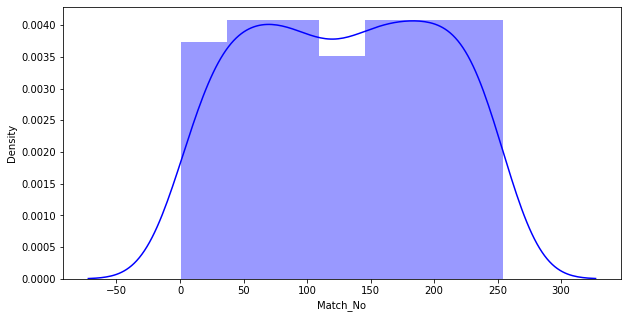

D/N


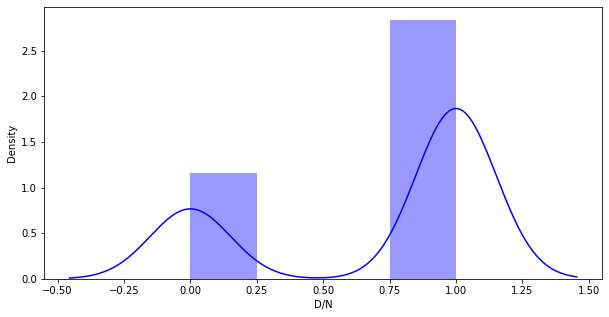

Runs


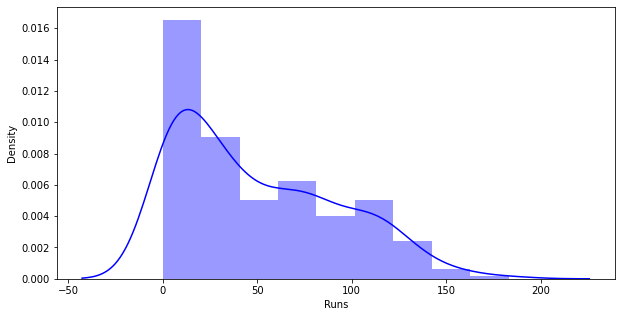

Balls_Faced


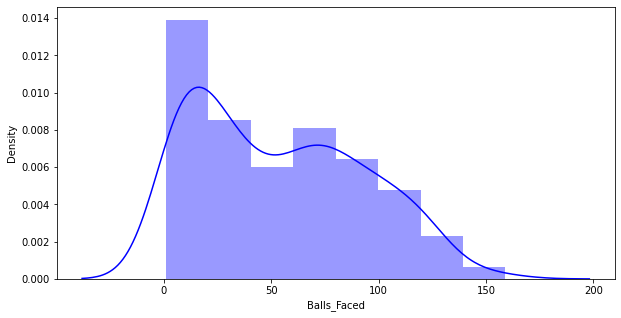

Strike_Rate


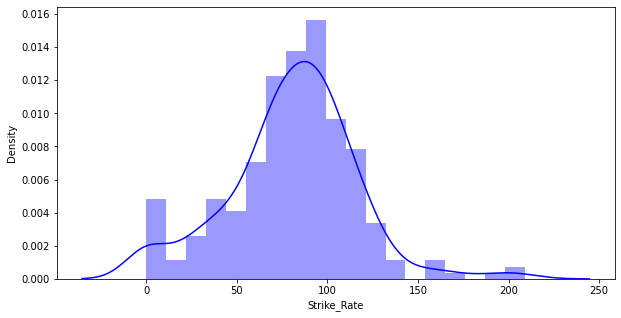

Progressive_Aggr


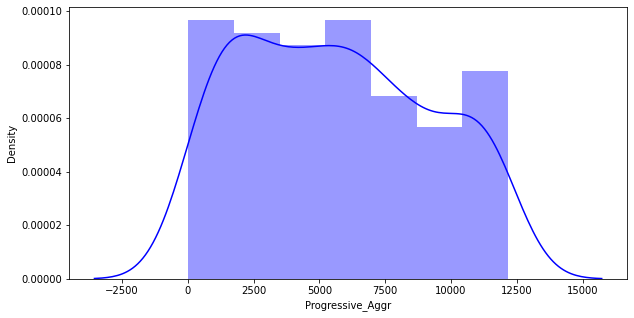

Progressive_Avg


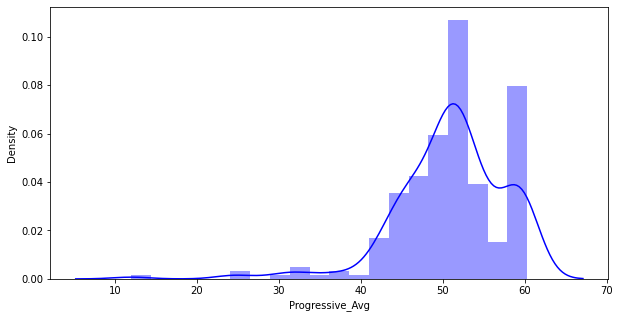

Progressive_Strike_Rate


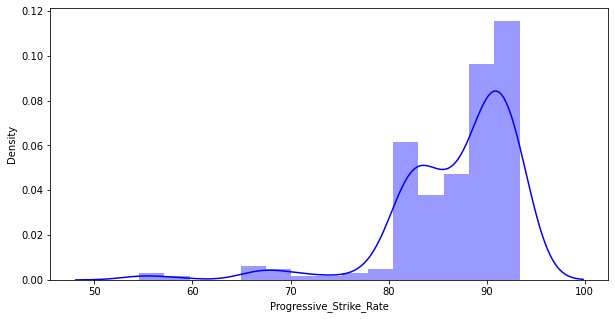

In [23]:
for i in df1.describe().columns:
    print(i)
    plt.figure(figsize=(10,5))
    sns.distplot(df1[i],color='b')
    plt.show()

### Oppositions most played against

Total matches played against the opposition

Sri Lanka               46
Australia               41
West Indies             38
England                 33
New Zealand             26
South Africa            25
Pakistan                13
Bangladesh              12
Zimbabwe                 5
Ireland                  2
Netherlands              1
United Arab Emirates     1
Afghanistan              1
Name: Versus, dtype: int64


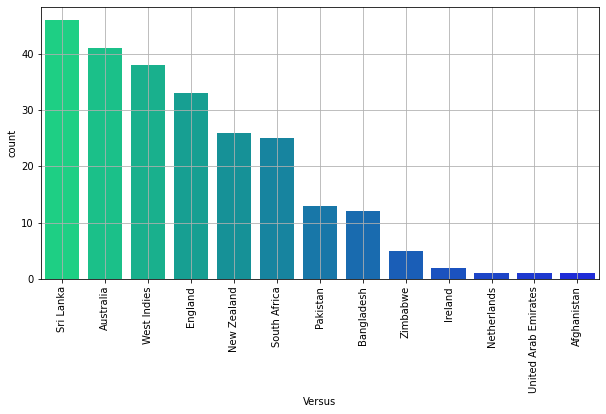

----------
Total D/N matches played
D/N
0     71
1    173
Name: Versus, dtype: int64


In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Versus'], order=df1.Versus.value_counts().index,palette='winter_r')
plt.xticks(rotation=90)
print('Total matches played against the opposition\n')
print(df1['Versus'].value_counts())
plt.grid()
plt.show()

print('-'*10)
print('Total D/N matches played')
print(df1.Versus.groupby(df1['D/N']).count())

# Grounds he has played and the average scores he has scored

### 1. Average scores at each venues

In [33]:
average_scores_at_each_venue = pd.DataFrame(df1.Runs.groupby(df1.Ground).mean())
average_scores_at_each_venue['Ground'] = average_scores_at_each_venue.index ## creating new features from the index 
average_scores_at_each_venue.index = np.arange(0,len(average_scores_at_each_venue)) ## creating new indices

### 2. Number of times he has played in each ground

In [34]:
count_of_grounds = pd.DataFrame(df1.Ground.value_counts())
count_of_grounds['Grounds'] = count_of_grounds.index
count_of_grounds.index = np.arange(0,len(count_of_grounds))
count_of_grounds.rename(columns={'Ground':'Count', 'Grounds':'Ground'},inplace=True)

### 3. Merging Average scores and count of matches played there

In [35]:
count_average_grounds = pd.merge(average_scores_at_each_venue,count_of_grounds,on='Ground')

In [36]:
count_average_grounds.rename(columns={'Runs':'Average_Runs'},inplace=True) ## renaming columns

In [37]:
count_average_grounds = count_average_grounds.sort_values(by='Average_Runs',ascending=False) ## sorting

### Grounds where he has scored Average runs Above 50 (Minimum 5 Innings)

In [38]:
count_average_grounds.loc[(count_average_grounds['Count'] > 5) & (count_average_grounds['Average_Runs'] > 50)]

,Average_Runs,Ground,Count
8,92.666667,Dr YS Rajasekhara Reddy Cricket Stadium,6
40,64.875000,R Premadasa Stadium,8
26,64.000000,Maharashtra Cricket Association Stadium,7
38,63.444444,Queen's Park Oval,9
49,60.461538,Shere Bangla National Stadium,13
9,54.333333,Eden Gardens,6


### Processing "Dismissal Type"

In [39]:
dty = []
for i in df1['Dismissal_Type']:
    dty.append(i.split(' ')[0])

In [40]:
dty1 = []
for i in dty:
    if i == 'run':
        dty1.append('run out')
    elif i == 'not':
        dty1.append('not out')
    elif i == 'hit':
        dty1.append('hit wicket')
    else:
        dty1.append(i)
        
df1['Dismissal_Type_info'] = dty1

### Visualizing the dismissal types

c             147
not out        39
b              28
lbw            14
run out        11
st              4
hit wicket      1
Name: Dismissal_Type_info, dtype: int64

Total number of times dismissed : 244 (out of 254 matches)


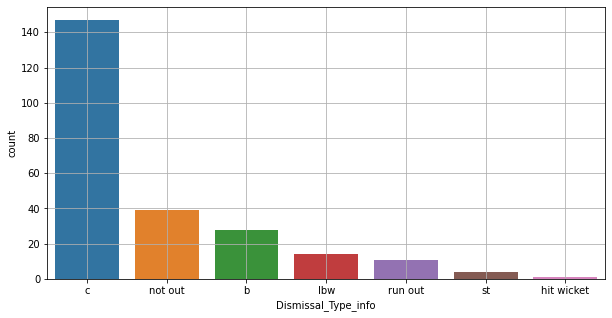

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Dismissal_Type_info'],order=df1['Dismissal_Type_info'].value_counts().index)
plt.grid()
print(df1['Dismissal_Type_info'].value_counts())

print('\nTotal number of times dismissed :',df1['Dismissal_Type_info'].value_counts().sum(),'(out of',len(df),'matches)')
plt.show()

# Average Runs scored in each country and the count of Innings played

### 1. Average runs in each country

In [42]:
avg_runs_wrt_country = pd.DataFrame(df1.Runs.groupby(df1.Country).mean())
avg_runs_wrt_country['Country'] = avg_runs_wrt_country.index
avg_runs_wrt_country.index = np.arange(0,len(avg_runs_wrt_country))
avg_runs_wrt_country.rename(columns={'Runs':'Average_Runs'},inplace=True) ## renaming columns

avg_runs_wrt_country = avg_runs_wrt_country.sort_values(by='Average_Runs',ascending=True) #Sorting

### 2. Count of innings in each country

In [43]:
count_of_innings_per_country = pd.DataFrame(df1.Runs.groupby(df1.Country).count())
count_of_innings_per_country['Country'] = count_of_innings_per_country.index
count_of_innings_per_country.index = np.arange(0,len(count_of_innings_per_country))
count_of_innings_per_country.rename(columns={'Runs':'Count_Of_Innings'},inplace=True)
# count_of_innings_per_country

### 3. Merging 1 and 2

In [44]:
avg_runs_wrt_country_with_coi = pd.merge(avg_runs_wrt_country,count_of_innings_per_country,on='Country')
# avg_runs_wrt_country_with_coi


    Average_Runs       Country  Count_Of_Innings
8     64.666667    Bangladesh                15
7     60.833333      Zimbabwe                 6
6     58.466667  South Africa                15
5     52.568421         India                95
4     48.529412   West Indies                17
3     45.846154   New Zealand                13
2     45.758621     Australia                29
1     42.451613       England                31
0     39.086957     Sri Lanka                23


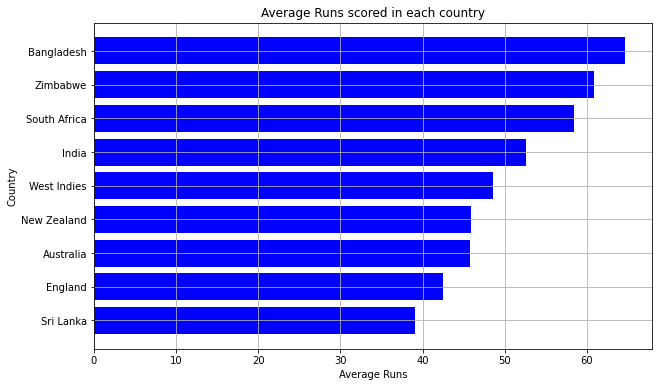

VK has more average in Bangladesh than in India


In [45]:
plt.figure(figsize=(10,6))
plt.barh(avg_runs_wrt_country_with_coi.Country, avg_runs_wrt_country_with_coi.Average_Runs,color='b')
plt.grid()
print('\n',avg_runs_wrt_country_with_coi.sort_values('Average_Runs',ascending=False))
plt.title('Average Runs scored in each country')
plt.xlabel('Average Runs')
plt.ylabel('Country')
plt.show()

print('VK has more average in Bangladesh than in India')

# Average Runs scored WRT Continent Category.

In [46]:
avg_runs_wrt_cc = pd.DataFrame(df1.Runs.groupby(df1.Continent_Category).mean())
avg_runs_wrt_cc['Continent_Category'] = avg_runs_wrt_cc.index
avg_runs_wrt_cc.index = np.arange(0,len(avg_runs_wrt_cc))
# avg_runs_wrt_cc

        Runs Continent_Category
1  51.739130              Other
0  51.601504               Asia
2  46.772727               SENA

*LEGEND*
SENA : SA, England, NZ & Australia.
Other : WI, Zimbabwe, UAE, Etc.


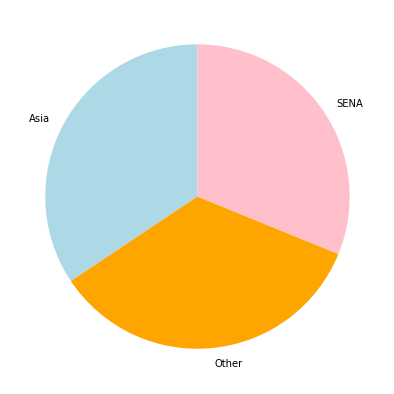

In [55]:
plt.figure(figsize=(8,7))
plt.pie(avg_runs_wrt_cc.Runs,labels=avg_runs_wrt_cc.Continent_Category,colors=['lightblue','orange','pink'],startangle=90)
print(avg_runs_wrt_cc.sort_values(by='Runs',ascending=False))
print('\n*LEGEND*\nSENA : SA, England, NZ & Australia.\nOther : WI, Zimbabwe, UAE, Etc.')
plt.show()

# Highest average strike rate wrt Oppositions and the count of innings he played

### 1/.Avg st rate and opposition

In [71]:
sr_wrt_versus = pd.DataFrame(df1.Strike_Rate.groupby(df1.Versus).mean())
sr_wrt_versus['Versus'] = sr_wrt_versus.index
sr_wrt_versus.index = np.arange(0,len(sr_wrt_versus))
# sr_wrt_versus

### 2. Opposition and the count of innings

In [70]:
coi_strate = pd.DataFrame(df1.Runs.groupby(df1.Versus).count())
coi_strate['Versus'] = coi_strate.index
coi_strate.index = np.arange(0,len(coi_strate))
coi_strate.rename(columns={'Runs':'Count_Of_Innings'},inplace=True)
# coi_strate

### 3. Merge 1 and 2

In [74]:
sr_versus_coi = pd.merge(sr_wrt_versus,coi_strate,on='Versus')
sr_versus_coi = sr_versus_coi.sort_values(by='Strike_Rate')

    Strike_Rate                Versus  Count_Of_Innings
5     60.000000           Netherlands                 1
7     70.206923              Pakistan                13
8     75.481600          South Africa                25
6     76.591154           New Zealand                26
3     78.323636               England                33
10    80.490000  United Arab Emirates                 1
12    80.554000              Zimbabwe                 5
9     80.655217             Sri Lanka                46
2     83.128333            Bangladesh                12
4     84.455000               Ireland                 2
1     84.461951             Australia                41
11    86.367632           West Indies                38
0    106.350000           Afghanistan                 1


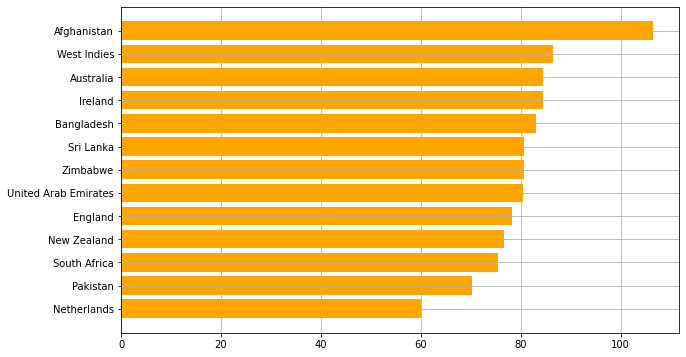

In [81]:
plt.figure(figsize=(10,6))
plt.barh(sr_versus_coi.Versus,sr_versus_coi.Strike_Rate,color='orange')
plt.grid()
print(sr_versus_coi)
plt.show()

# Highest average scores and the number of innings against them.

### 1. runs vs oppositions (average scores)

In [90]:
runs_wrt_versus = pd.DataFrame(df1.Runs.groupby(df1.Versus).mean())
runs_wrt_versus['Versus'] = runs_wrt_versus.index
runs_wrt_versus.index = np.arange(0,len(runs_wrt_versus))
# runs_wrt_versus

### 2. number of times played against the opposition

In [91]:
coi_runs = pd.DataFrame(df1.Runs.groupby(df1.Versus).count())
coi_runs['Versus'] = coi_runs.index
coi_runs.index = np.arange(0,len(coi_runs))
coi_runs.rename(columns={'Runs':'Count_Of_Innings'},inplace=True)
# coi_runs

### 3. Merge 1 & 2

In [84]:
runs_versus_coi = pd.merge(runs_wrt_versus,coi_runs,on='Versus')
runs_versus_coi = runs_versus_coi.sort_values(by='Runs')

         Runs                Versus  Count_Of_Innings
0   67.000000           Afghanistan                 1
11  58.815789           West Indies                38
2   56.666667            Bangladesh                12
6   53.000000           New Zealand                26
8   51.480000          South Africa                25
1   50.804878             Australia                41
12  50.600000              Zimbabwe                 5
9   48.260870             Sri Lanka                46
7   41.230769              Pakistan                13
3   39.606061               England                33
4   39.000000               Ireland                 2
10  33.000000  United Arab Emirates                 1
5   12.000000           Netherlands                 1


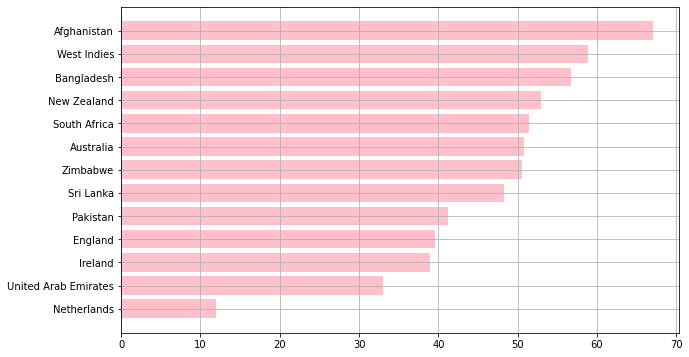

In [95]:
plt.figure(figsize=(10,6))
plt.barh(runs_versus_coi.Versus,runs_versus_coi.Runs,color='pink')
plt.grid()
print(runs_versus_coi.sort_values('Runs',ascending=False))
plt.show()

### Creating New Features for Century and Half Century

In [58]:
c = []
hc = []
for i in df1.Runs:
    if i >= 100:
        c.append(1)
    else :
        c.append(0)
for i in df1.Runs:        
    if 50 <= i < 100:
        hc.append(1)
    else :
        hc.append(0)
        
df1['Century'] = c
df1['Half_Century'] = hc

In [59]:
df1.head()

,Match_No,Date,Versus,Ground,Country,Continent_Category,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate,Status,Dismissal_Type_info,Century,Half_Century
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,lbw b K M D N Kulasekara,12,22,54.55,12,12.00,54.55,Out,lbw,0,0
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,Sri Lanka,Asia,0,c C K Kapugedera b T Thushara,37,67,55.22,49,24.50,55.06,Out,c,0,0
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,run out,25,38,65.79,74,24.67,58.27,Out,run out,0,0
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,b T Thushara,54,66,81.82,128,32.00,66.32,Out,b,0,1
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,Sri Lanka,Asia,1,lbw b K M D N Kulasekara,31,46,67.39,159,31.80,66.53,Out,lbw,0,0


In [48]:
# df1[df1.Dismissal_Type.str.contains('Kulase')]

### Predictions

In [40]:
ml = df1.copy()

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
ml.head()

,Match_No,Date,Versus,Ground,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate,Status,Dismissal_Type_info
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,lbw b K M D N Kulasekara,12,22,54.55,12,12.00,54.55,Out,lbw
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,c C K Kapugedera b T Thushara,37,67,55.22,49,24.50,55.06,Out,c
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,1,run out,25,38,65.79,74,24.67,58.27,Out,run out
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,1,b T Thushara,54,66,81.82,128,32.00,66.32,Out,b
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,1,lbw b K M D N Kulasekara,31,46,67.39,159,31.80,66.53,Out,lbw


In [43]:
le = LabelEncoder()
ml['Ground_encoded'] = le.fit_transform(ml['Ground'])
ml['Dismissal_Type_info'] = le.fit_transform(ml['Dismissal_Type_info'])


In [44]:
ml['Versus_encoded'] = le.fit_transform(ml['Versus'])

In [45]:
ml.head()

,Match_No,Date,Versus,Ground,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate,Status,Dismissal_Type_info,Ground_encoded,Versus_encoded
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,lbw b K M D N Kulasekara,12,22,54.55,12,12.00,54.55,Out,3,42,9
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,c C K Kapugedera b T Thushara,37,67,55.22,49,24.50,55.06,Out,1,42,9
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,1,run out,25,38,65.79,74,24.67,58.27,Out,5,40,9
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,1,b T Thushara,54,66,81.82,128,32.00,66.32,Out,0,40,9
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,1,lbw b K M D N Kulasekara,31,46,67.39,159,31.80,66.53,Out,3,40,9


In [46]:
ml.drop(['Match_No','Date','Versus','Ground','Dismissal_Type','Balls_Faced','Progressive_Aggr','Progressive_Avg','Progressive_Strike_Rate','Status'],axis=1,inplace=True)

In [47]:
ml.head()

,D/N,Runs,Strike_Rate,Dismissal_Type_info,Ground_encoded,Versus_encoded
0,0,12,54.55,3,42,9
1,0,37,55.22,1,42,9
2,1,25,65.79,5,40,9
3,1,54,81.82,0,40,9
4,1,31,67.39,3,40,9
